In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("C:/Users/user/OneDrive/Desktop/Career/Data Glacier VI/VC-1/DataSets/Transaction_ID.csv")
df2 = pd.read_csv("C:/Users/user/OneDrive/Desktop/Career/Data Glacier VI/VC-1/DataSets/Cab_Data.csv")
df2['Date of Travel'] = pd.to_datetime(df2['Date of Travel'], infer_datetime_format=True)

In [4]:
df1.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
#create new  columns from Date of Travel
df2['Day'] = df2['Date of Travel'].dt.day
df2['Month'] = df2['Date of Travel'].dt.month
df2['Year'] = df2['Date of Travel'].dt.year

In [6]:
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,3,2016


In [7]:
df1.shape
print(f'This dataset has {df1.shape[0]} rows and {df1.shape[1]} columns.')

This dataset has 440098 rows and 3 columns.


In [8]:
df1.columns
df1.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [9]:
df2.columns
df2.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
Day                        int64
Month                      int64
Year                       int64
dtype: object

In [10]:
df1.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [11]:
print("Total Number of Trips:", df2.shape[0])

Total Number of Trips: 359392


In [12]:
inner = pd.merge(df1, df2, on='Transaction ID')
inner.rename(columns={"Transaction ID": "Transaction_ID", "Customer ID": "Customer_ID", "Date of Travel": "Travel_Date", "KM Travelled": "KM_Travelled", "Price Charged": "Revenue", "Cost of Trip": "Trip_Cost"})

,Transaction_ID,Customer_ID,Payment_Mode,Travel_Date,Company,City,KM_Travelled,Revenue,Trip_Cost,Day,Month,Year
0,10000011,29290,Card,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,8,2016
1,10000012,27703,Card,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,6,2016
2,10000013,28712,Cash,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2,2016
3,10000014,28020,Cash,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,7,2016
4,10000015,27182,Card,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,8,2018
359388,10440104,53286,Cash,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,4,2018
359389,10440105,52265,Cash,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,5,2018
359390,10440106,52175,Card,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,5,2018


In [13]:
inner.describe()

,Transaction ID,Customer ID,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,15.972835,7.156047,2017.045199
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,8.503010,3.413283,0.800239
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,1.000000,1.000000,2016.000000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,9.000000,4.000000,2016.000000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,16.000000,8.000000,2017.000000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,23.000000,10.000000,2018.000000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,31.000000,12.000000,2018.000000


In [14]:
# Check for missing values
inner.isnull().values.any()

False

In [67]:
inner.groupby(["Year", "Company"])["Price Charged"].max()

Year  Company   
2016  Pink Cab      1623.48
      Yellow Cab    1978.79
2017  Pink Cab      1517.15
      Yellow Cab    2048.03
2018  Pink Cab      1332.98
      Yellow Cab    1993.83
Name: Price Charged, dtype: float64

In [69]:
print('Yellow Cab recorded significantly higher earnings than Pink Cab for three consecutive years')

Yellow Cab recorded significantly higher earnings than Pink Cab for three consecutive years


In [70]:
inner.groupby(["Month", "Day", "Company"])["Price Charged"].median()

Month  Day  Company   
1      1    Pink Cab      358.25
            Yellow Cab    454.82
       2    Pink Cab      243.55
            Yellow Cab    408.72
       3    Pink Cab      286.23
                           ...  
12     29   Yellow Cab    447.74
       30   Pink Cab      341.49
            Yellow Cab    398.09
       31   Pink Cab      360.23
            Yellow Cab    431.64
Name: Price Charged, Length: 732, dtype: float64

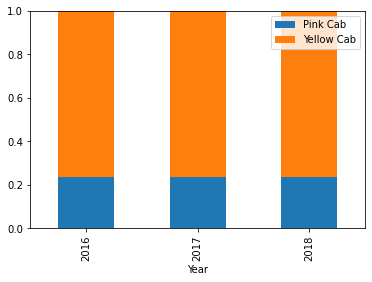

In [17]:
revenue_per_year = inner.pivot_table(index='Year', columns='Company', values='Price Charged', aggfunc=len)
revenue_per_year = revenue_per_year.divide(revenue_per_year.sum(axis=1), axis=0)
ax = revenue_per_year.plot(kind='bar', stacked='true')
ax.legend(loc='upper right')
ax.set_ylim(0, 1)
plt.show()

In [71]:
print('Yearly earnings per company')

Yearly earnings per company


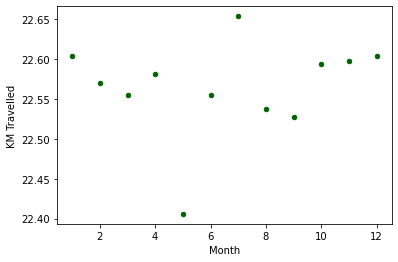

In [18]:
Trip_distance = inner.pivot_table(index='Month', values='KM Travelled')
Trip_distance.reset_index().plot.scatter('Month', 'KM Travelled', color='DarkGreen')
plt.show()

In [72]:
print('Towards the festive season, users appear to travel lonhger distances. We attribute this to holidays where customers might be travelling back home or visit tourist destinations')

Towards the festive season, users appear to travel lonhger distances. We attribute this to holidays where customers might be travelling back home or visit tourist destinations


In [73]:
# Customer Distribution

In [74]:
sns.set_style('darkgrid')

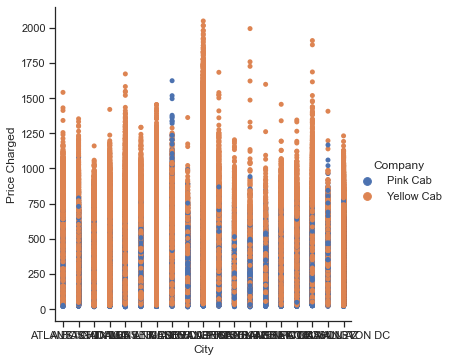

In [75]:
#average profit by city
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(y='Price Charged', x='City', data=inner, jitter=False, hue='Company');

In [21]:
# Customer Segmentation

In [22]:
# Last available date
inner['Date of Travel'].max()

Timestamp('2018-12-31 00:00:00')

In [23]:
# Earliest available date
inner['Date of Travel'].min()

Timestamp('2016-01-02 00:00:00')

In [24]:
import datetime as dt
now = dt.date(2018, 12, 31)
print(now)

2018-12-31


In [25]:
inner['Date'] = pd.DatetimeIndex(inner['Date of Travel']).date

In [26]:
inner.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Date
0,10000011,29290,Card,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,8,2016,2016-08-01
1,10000012,27703,Card,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,6,2016,2016-06-01
2,10000013,28712,Cash,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2,2016,2016-02-01
3,10000014,28020,Cash,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,7,2016,2016-07-01
4,10000015,27182,Card,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,3,2016,2016-03-01


In [27]:
# Group by customer and last date of purchase
recency_df = inner.groupby(by='Customer ID', as_index=False)['Date'].max()
recency_df.columns = ['Customer ID', 'LastPurchaseDate']
recency_df.head()

,Customer ID,LastPurchaseDate
0,1,2018-12-16
1,2,2018-12-16
2,3,2018-12-22
3,4,2018-12-15
4,5,2018-12-29


In [28]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [29]:
recency_df.head()

,Customer ID,LastPurchaseDate,Recency
0,1,2018-12-16,15
1,2,2018-12-16,15
2,3,2018-12-22,9
3,4,2018-12-15,16
4,5,2018-12-29,2


In [30]:
recency_df.drop('LastPurchaseDate', axis=1, inplace=True)

In [31]:
# Customer distribution by city
inner.City.nunique()

19

In [32]:
# Group Customers by City
customer_city = inner[['City', 'Customer ID']].drop_duplicates()
customer_city.groupby(['City'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,City,Customer ID
9,NEW YORK NY,3000
3,CHICAGO IL,3000
6,LOS ANGELES CA,3000
18,WASHINGTON DC,3000
2,BOSTON MA,3000
14,SAN DIEGO CA,2998
16,SILICON VALLEY,2834
15,SEATTLE WA,2811
0,ATLANTA GA,2780
4,DALLAS TX,2743


In [33]:
# Calculate Frequency
frequency_df = inner.groupby(by=['Customer ID'], as_index=False)['Transaction ID'].count()
frequency_df.columns = ['Customer ID', 'Frequency']
frequency_df.head()

,Customer ID,Frequency
0,1,29
1,2,40
2,3,46
3,4,26
4,5,31


In [34]:
from operator import attrgetter

In [35]:
inner.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Day,359392.0,1.597283e+01,8.503010,1.0,9.000000e+00,16.00,2.300000e+01,31.00
Month,359392.0,7.156047e+00,3.413283,1.0,4.000000e+00,8.00,1.000000e+01,12.00
Year,359392.0,2.017045e+03,0.800239,2016.0,2.016000e+03,2017.00,2.018000e+03,2018.00


In [ ]:
# Merge City with Transactions on 'City'


In [36]:
df3 = pd.read_csv("C:/Users/user/OneDrive/Desktop/Career/Data Glacier VI/VC-1/DataSets/City.csv")

In [37]:
df3.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [38]:
df3.shape
print(f'This dataset has {df3.shape[0]} rows and {df3.shape[1]} columns.')

This dataset has 20 rows and 3 columns.


In [39]:
df3.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [40]:
df3.isnull().values.any()

False

In [41]:
df3.describe().nunique()

City          3
Population    3
Users         3
dtype: int64

In [62]:
print('We assume that two of three types of cab users represent users of either Yellow Cab or Pink Cab, while the third type of user represents another cab company')

We assume that two of three types of cab users represent users of either Yellow Cab or Pink Cab, while the third type of user represents another cab company


In [42]:
df3.describe().transpose()

,count,unique,top,freq
City,20,20,LOS ANGELES CA,1
Population,20,20,"8,405,837",1
Users,20,20,"7,044",1


In [46]:
df3['Users'].max()

' 9,270 '

In [47]:
inner2 = pd.merge(inner, df3, on='City')

In [48]:
inner2.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Date,Population,Users
0,10000011,29290,Card,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,8,2016,2016-08-01,"814,885","24,701"
1,10000012,27703,Card,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,6,2016,2016-06-01,"814,885","24,701"
2,10000013,28712,Cash,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2,2016,2016-02-01,"814,885","24,701"
3,10000014,28020,Cash,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,7,2016,2016-07-01,"814,885","24,701"
4,10000015,27182,Card,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,3,2016,2016-03-01,"814,885","24,701"


In [49]:
inner2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Customer ID     359392 non-null  int64         
 2   Payment_Mode    359392 non-null  object        
 3   Date of Travel  359392 non-null  datetime64[ns]
 4   Company         359392 non-null  object        
 5   City            359392 non-null  object        
 6   KM Travelled    359392 non-null  float64       
 7   Price Charged   359392 non-null  float64       
 8   Cost of Trip    359392 non-null  float64       
 9   Day             359392 non-null  int64         
 10  Month           359392 non-null  int64         
 11  Year            359392 non-null  int64         
 12  Date            359392 non-null  object        
 13  Population      359392 non-null  object        
 14  Users           359392 non-null  obj

In [55]:
inner2.groupby(['Transaction ID'])['Company'].sum()

Transaction ID
10000011      Pink Cab
10000012      Pink Cab
10000013      Pink Cab
10000014      Pink Cab
10000015      Pink Cab
               ...    
10440101    Yellow Cab
10440104    Yellow Cab
10440105    Yellow Cab
10440106    Yellow Cab
10440107    Yellow Cab
Name: Company, Length: 359392, dtype: object

In [56]:
cat_inner2 = inner2.select_dtypes(include=['object']).copy()

In [57]:
cat_inner2.head()

,Payment_Mode,Company,City,Date,Population,Users
0,Card,Pink Cab,ATLANTA GA,2016-08-01,"814,885","24,701"
1,Card,Pink Cab,ATLANTA GA,2016-06-01,"814,885","24,701"
2,Cash,Pink Cab,ATLANTA GA,2016-02-01,"814,885","24,701"
3,Cash,Pink Cab,ATLANTA GA,2016-07-01,"814,885","24,701"
4,Card,Pink Cab,ATLANTA GA,2016-03-01,"814,885","24,701"


In [58]:
cat_inner2.isnull().values.sum()

0

In [59]:
cat_inner2.isnull().sum()

Payment_Mode    0
Company         0
City            0
Date            0
Population      0
Users           0
dtype: int64

In [60]:
cat_inner2['City'].value_counts(normalize=True)

NEW YORK NY       0.277928
CHICAGO IL        0.157558
LOS ANGELES CA    0.133651
WASHINGTON DC     0.121697
BOSTON MA         0.082617
SAN DIEGO CA      0.057007
SILICON VALLEY    0.023704
SEATTLE WA        0.022251
ATLANTA GA        0.021027
DALLAS TX         0.019525
MIAMI FL          0.017958
AUSTIN TX         0.013623
ORANGE COUNTY     0.011080
DENVER CO         0.010643
NASHVILLE TN      0.008375
SACRAMENTO CA     0.006586
PHOENIX AZ        0.005743
TUCSON AZ         0.005373
PITTSBURGH PA     0.003653
Name: City, dtype: float64

In [61]:
print('New York appears to have the most frequent cab users(27%)')# Frequency of users per city - New York appears to have the most frequent cab users (27%)

New York appears to have the most frequent cab users(27%)


In [76]:
cat_inner2['Company'].value_counts(normalize=True)

Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64

In [77]:
# Frequency distribution of users by cab company
print('Yellow Cab appears to be 76% more popular among cab users')

Yellow Cab appears to be 76% more popular among cab users


In [86]:
cat_inner2['Payment_Mode'].value_counts(normalize=True)

Card    0.599635
Cash    0.400365
Name: Payment_Mode, dtype: float64

In [79]:
# Frequency distribution of users by mode of payment
print('59% of cab users prefer paying by card')

59% of cab users prefer paying by card


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


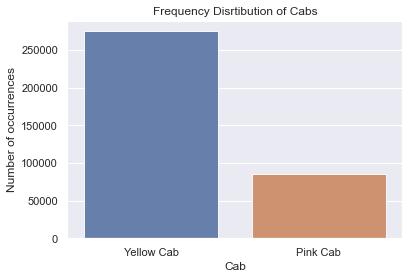

In [27]:
# Visual Distribution of Categorical data
cab_count = cat_inner2['Company'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cab_count.index, cab_count.values, alpha=0.9)
plt.title('Frequency Disrtibution of Cabs')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Cab', fontsize=12)
plt.show()

In [88]:
df4 = pd.read_csv("C:/Users/user/OneDrive/Desktop/Career/Data Glacier VI/VC-1/DataSets/Customer_ID.csv")

In [89]:
df4.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [90]:
inner3 = pd.merge(inner2, df4, on='Customer ID')

In [91]:
inner3.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Date,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,8,2016,2016-08-01,"814,885","24,701",Male,28,10813
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21,7,2018,2018-07-21,"814,885","24,701",Male,28,10813
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23,11,2018,2018-11-23,"814,885","24,701",Male,28,10813
3,10000012,27703,Card,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,6,2016,2016-06-01,"814,885","24,701",Male,27,9237
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21,4,2018,2018-04-21,"814,885","24,701",Male,27,9237


In [39]:
inner3.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Day                   0
Month                 0
Year                  0
Date                  0
Population            0
Users                 0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

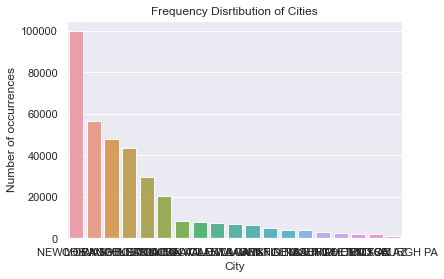

In [42]:
city_count = cat_inner2['City'].value_counts()
sns.set(style="darkgrid")
sns.barplot(city_count.index, city_count.values, alpha=0.9)
plt.title('Frequency Disrtibution of Cities')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [93]:
import scipy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
warnings.filterwarnings('ignore')

<AxesSubplot:>

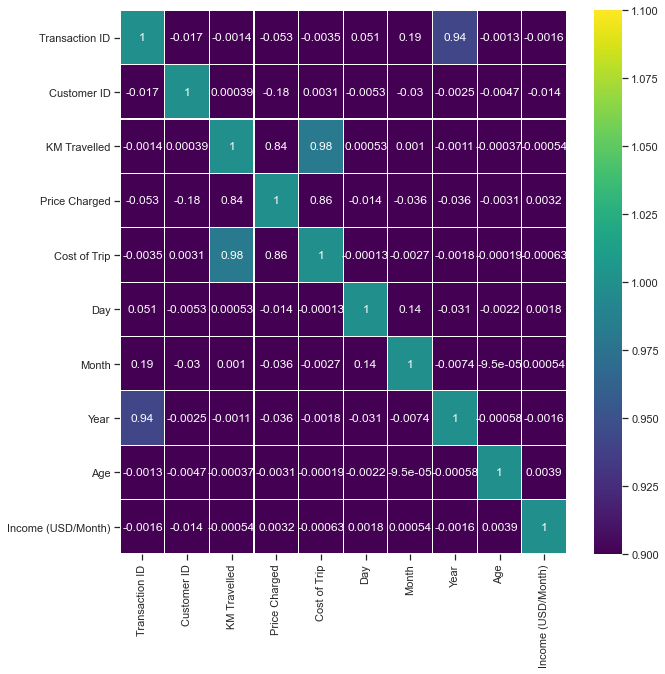

In [94]:
inner3_kor = inner3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(inner3_kor, vmin=1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [ ]:
sns.pairplot(inner3, hue='Company')

In [95]:
Y = inner3["Price Charged"]
X = inner3[["Cost of Trip", "KM Travelled", "Year", "Company", "Transaction ID" ]]
X = pd.get_dummies(data=X, drop_first=True)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=214)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 215635
Testing Data Count: 143757


In [97]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price Charged   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.364e+05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:21:26   Log-Likelihood:            -1.3630e+06
No. Observations:              215635   AIC:                         2.726e+06
Df Residuals:                  215629   BIC:                         2.726e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -6.21e+04   2104.762    -29.503      0.000   -6.62e+04    -5.8e+04
Cost of Trip           0.8511      0.014     62.537      0.000       0.824       0.878
KM Travelled           7.9409      0.174     45.592      0.000       7.599       8.282
Year                  32.2473      1.076     29.974      0.000      30.139      34.356
Transaction ID        -0.0003   6.79e-06    -43.606      0.000      -0.000      -0.000
Company_Yellow Cab   104.1616      0.960    108.464      0.000     102.279     106.044
==============================================================================
Omnibus:                    53529.599   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173091.627
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                       6.593   Cond. No.                     7.43e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
print('76% of the variance in the model can be explained. From the pvalue, all independent variables are significant.')

76% of the variance in the model can be explained. From the pvalue, all independent variables are significant.


In [99]:
print('Price Charged(Yellow Cab) = -62100 + 0.8511(Cost of Trip) + 7.9409(KM Travelled) + 32.247(Year) -0.0003(Transaction ID)')

Price Charged(Yellow Cab) = -62100 + 0.8511(Cost of Trip) + 7.9409(KM Travelled) + 32.247(Year) -0.0003(Transaction ID)


In [100]:
Y = inner3["Price Charged"]
X = inner3[["Cost of Trip", "KM Travelled", "Year", "Company", "Transaction ID" ]]
X = pd.get_dummies(data=X, drop_first=False)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=214)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 215635
Testing Data Count: 143757


In [102]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price Charged   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 1.364e+05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:44:00   Log-Likelihood:            -1.3630e+06
No. Observations:              215635   AIC:                         2.726e+06
Df Residuals:                  215629   BIC:                         2.726e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.136e+04   1403.183    -29.478      0.000   -4.41e+04   -3.86e+04
Cost of Trip           0.8511      0.014     62.537      0.000       0.824       0.878
KM Travelled           7.9409      0.174     45.592      0.000       7.599       8.282
Year                  32.2473      1.076     29.974      0.000      30.139      34.356
Transaction ID        -0.0003   6.79e-06    -43.606      0.000      -0.000      -0.000
Company_Pink Cab   -2.073e+04    701.580    -29.553      0.000   -2.21e+04   -1.94e+04
Company_Yellow Cab -2.063e+04    701.603    -29.404      0.000    -2.2e+04   -1.93e+04
==============================================================================
Omnibus:                    53529.599   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173091.627
Skew:                           1.260   Prob(JB):                         0.00
Kurtosis:                       6.593   Cond. No.                     4.91e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.35e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
inner3.shape

(359392, 18)